# Progetto Visualizzazione Scientifica
### Autori 
Simone Alessandro Casciaro 987303<br>
Michela Francesca Firrera 02022A

### Scaletta
- Introduzione
    - 1 slide su spiegazione di cos'è un GP
    - Chi ha vinto più GP? (Piloti e Costruttori)
    - Distribuzione delle vittorie del miglior pilota (L. Hamilton) e della migliore squadra (Ferrari)
        - Appunto sul dire che Hamilton non ha mai corso in Ferrari
- Com'è strutturato un GP?
    - Slide che mostra il format classico: FP1, FP2, FP3, Q1, Q2, Q3 e R
- Inizio Analisi GP
    - Studio delle FP1
    - Studio delle FP2
    - Studio delle FP3
        ...
- Introduzione format alternativo
    - Slide che mostra il format Sprint: FP1, Q1, Q2, Q3, SQ1, SQ2, SQ3, SR, R
    - Come cambia l'analisi di un GP nei format Sprint?
        ...
- Domande finali
    - Troveremo domande in corso d'opera alla quale rispondere con ulteriori grafici
- Conclusione

### Fonti
- Dataset http://ergast.com/mrd/
- Stile Grafici https://docs.fastf1.dev/plotting.html
- Telemetrie https://docs.fastf1.dev/core.html

### Apertura File

In [1]:
import pandas as pd

points = pd.read_csv('Dataset/constructor_standings.csv')
results = pd.read_csv('Dataset/results.csv')
constructors = pd.read_csv('Dataset/constructors.csv')
drivers = pd.read_csv('Dataset/drivers.csv')
races = pd.read_csv('Dataset/races.csv')
circuits = pd.read_csv('Dataset/circuits.csv')

# Introduzione
### Chi ha vinto più GP in F1?

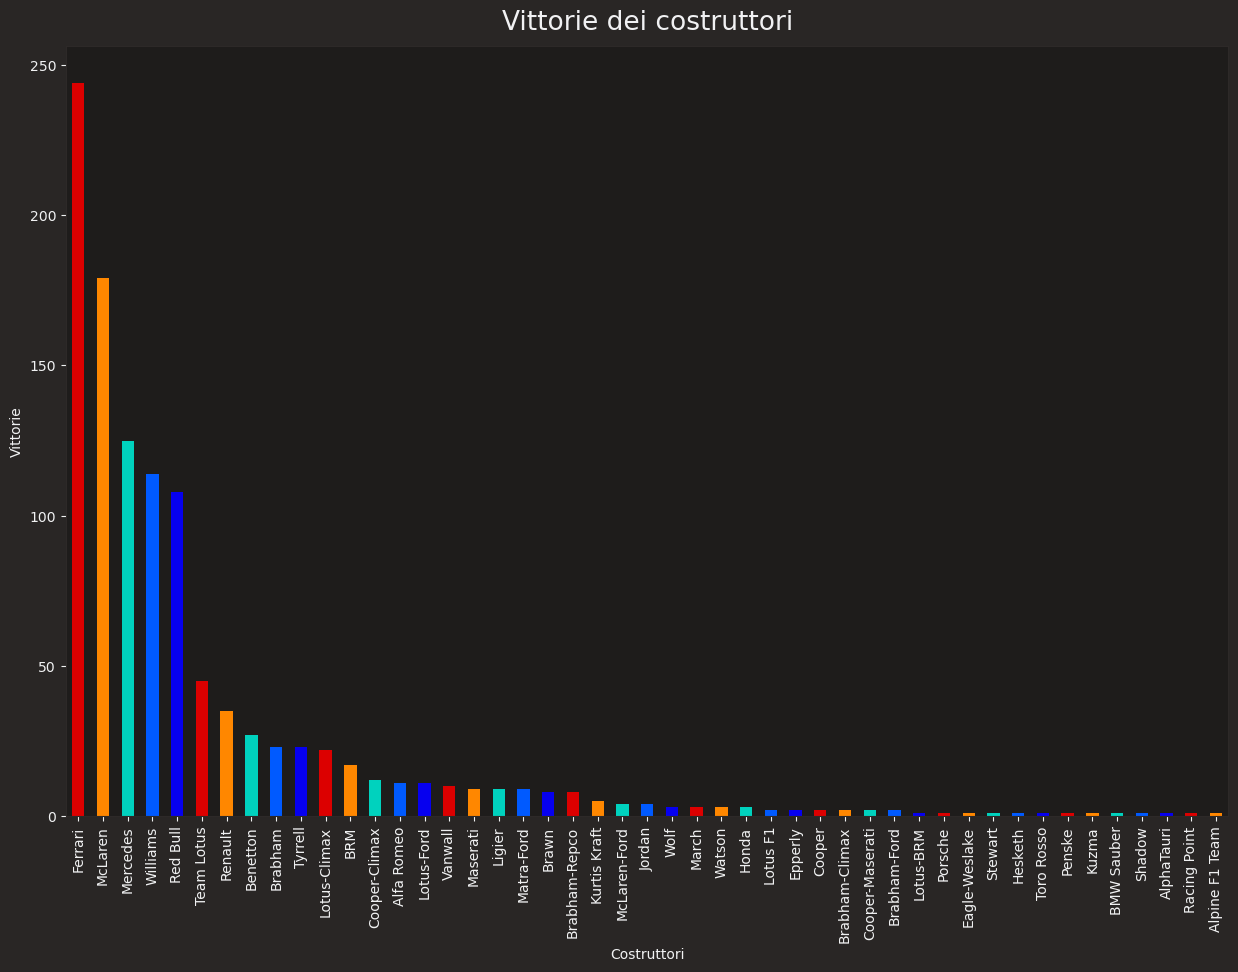

In [96]:
import matplotlib.pyplot as plt
import fastf1.plotting as f1p

f1p.setup_mpl()

plt.rc('figure', figsize=(15.0, 10.0))

c_wins = results[results['positionOrder']==1].merge(constructors, on = 'constructorId')

colorStyle = [
    f1p.team_color('Fer'), # Ferrari
    f1p.team_color('Mcl'), # McLaren
    f1p.team_color('Mer'),
    f1p.team_color('Wil'),
    f1p.team_color('Rbr'),
    # ...
]

plt.xlabel('Costruttori')
plt.ylabel('Vittorie')
plt.title('Vittorie dei costruttori')

c_wins['name'].value_counts().plot.bar(color = colorStyle)
plt.show()

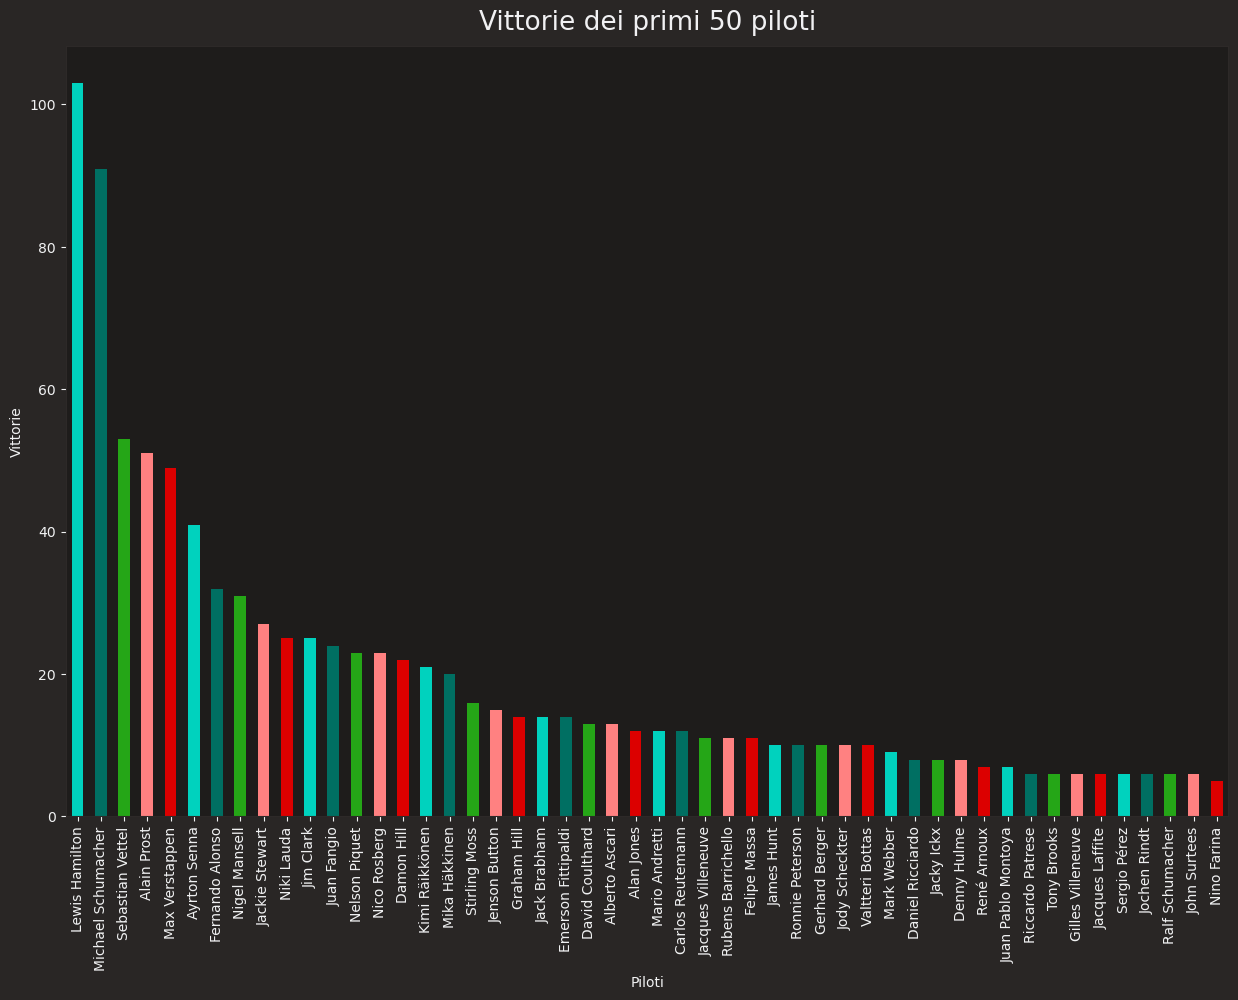

In [95]:
d_wins = results[results['positionOrder']==1].merge(drivers, on = 'driverId')
complete_name = d_wins['forename'] + ' ' + d_wins['surname']
d_wins['complete_name'] = complete_name

colorStyle = [
    f1p.driver_color('Ham'), # 
    f1p.driver_color('Alo'), # 
    f1p.driver_color('Str'),
    f1p.driver_color('Sai'),
    f1p.driver_color('Lec'),
    # ...
]

plt.xlabel('Piloti')
plt.ylabel('Vittorie')
plt.title('Vittorie dei primi 50 piloti')
d_wins['complete_name'].value_counts().head(50).plot.bar(color = colorStyle) # Limit 50 per visualizzazione del grafico
plt.show()

### Grafico a torta dei vincitori

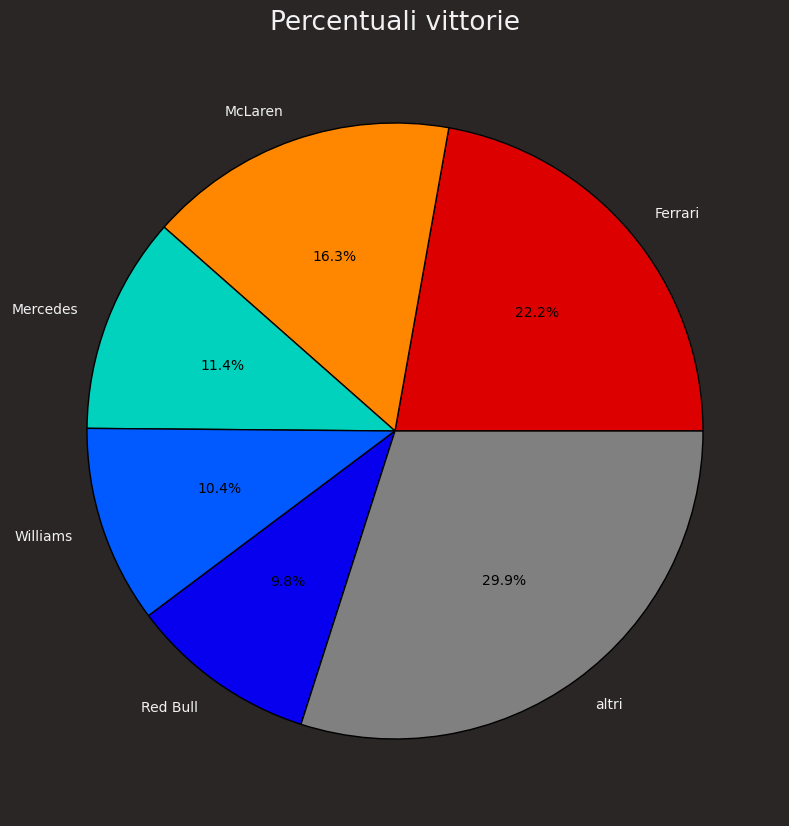

In [100]:
vc = c_wins['name'].value_counts().head(5)
others = pd.Series(c_wins['name'].value_counts()[5:].sum(), index = ['altri'])
pie = pd.concat([vc, others])

colorStyle = [
    f1p.team_color('Fer'), # Ferrari
    f1p.team_color('Mcl'), # McLaren
    f1p.team_color('Mer'),
    f1p.team_color('Wil'),
    f1p.team_color('Rbr'),
    'grey'
]


fig, ax = plt.subplots()

plt.title('Percentuali vittorie')
explode = [0.0, 0, 0, 0, 0, 0]
pie_wedges, texts, autotexts = ax.pie(pie, labels=pie.index, colors = colorStyle, autopct='%1.1f%%', explode = explode, wedgeprops = {'edgecolor': 'black'})
for autotext in autotexts:
    autotext.set_color('black')

### Grafico piloti, ha senso?

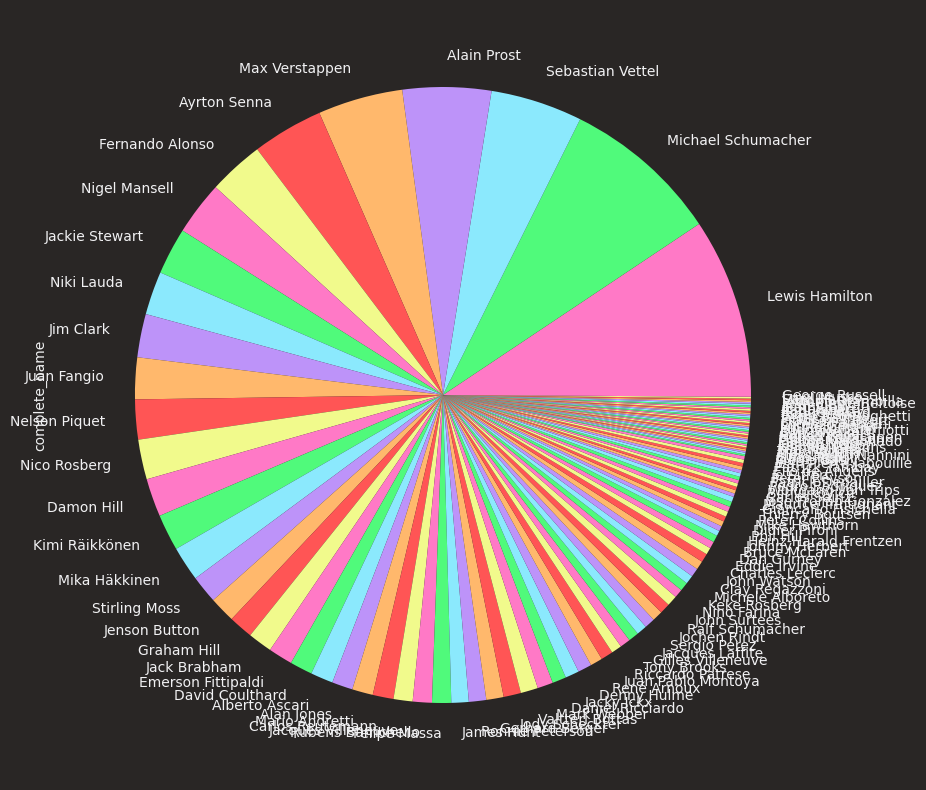

In [101]:
vd = d_wins['complete_name'].value_counts().plot.pie()
#others = pd.Series(c_wins['name'].value_counts()[5:].sum(), index = ['others'])
#pie = pd.concat([vc, others])

colorStyle = [
    f1p.team_color('Fer'), # Ferrari
    f1p.team_color('Mcl'), # McLaren
    f1p.team_color('Mer'),
    f1p.team_color('Wil'),
    f1p.team_color('Rbr'),
    'grey'
]


#fig, ax = plt.subplots()

#pie_wedges, texts, autotexts = ax.pie(pie, labels=pie.index, colors = colorStyle, autopct='%1.1f%%', wedgeprops = {'edgecolor': 'black'})
#for autotext in autotexts:
#    autotext.set_color('black')

### Quando hanno vinto i due più vincenti? (Ferrari e L. Hamilton)

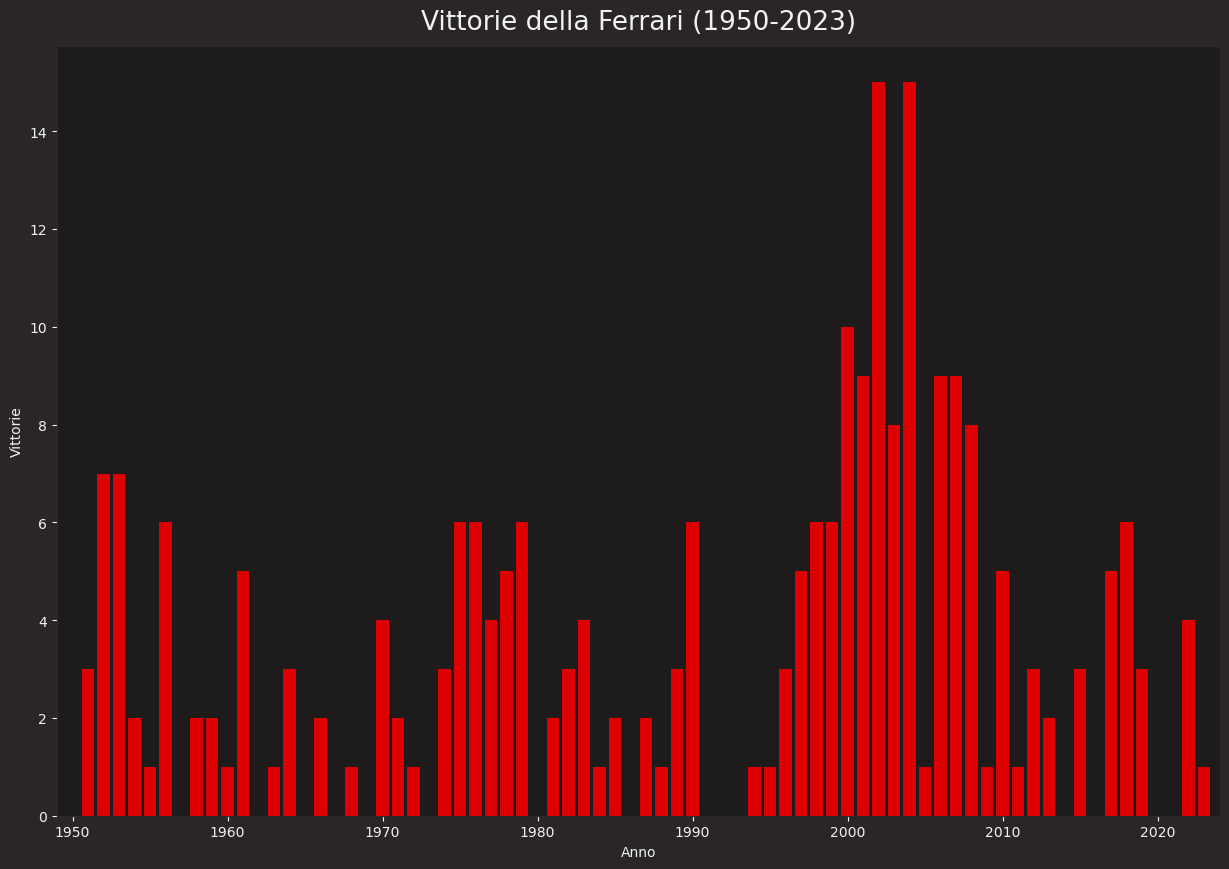

In [105]:
idFerrari = 6
fer_wins = results[(results['constructorId'] == idFerrari) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')
fer_wins[['year']].groupby('year').value_counts()

# Il tuo codice per creare fer_wins è qui

# Calcola il conteggio delle vittorie per ogni anno
win_count = fer_wins['year'].value_counts().reset_index()
win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 al 2023
all_years = pd.DataFrame({'year': range(1950, 2024)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
win_count = all_years.merge(win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(win_count['year'], win_count['wins'], color = f1p.team_color('FER'))
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(1949,2024)
plt.title('Vittorie della Ferrari (1950-2023)')
plt.show()